
# Regression Assignment - House Prices

## Introduction

This notebook will seek to build Linear, Lasso & Ridge regression models to predict house prices. We will begin with exploring the data to get a better understanding, then will conduct the relevant regression. 

- The results of the regresion will be reported, with a 70% training and 30% testing split.

- Will conduct cross validation of 4 folds.

- Grid search for Lasso

- Report metrics of RSquared, RMSE, MSE, MAE, MAPE

In [1]:
# Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset and view
df = pd.read_csv('house_prices.csv')
df.head()

Area  Garage  FirePlace  Baths  White Marble  Black Marble  Indian Marble  \
0   164       2          0      2             0             1              0   
1    84       2          0      4             0             0              1   
2   190       2          4      4             1             0              0   
3    75       2          4      4             0             0              1   
4   148       1          4      2             1             0              0   

   Floors  City  Solar  Electric  Fiber  Glass Doors  Swiming Pool  Garden  \
0       0     3      1         1      1            1             0       0   
1       1     2      0         0      0            1             1       1   
2       0     2      0         0      1            0             0       0   
3       1     1      1         1      1            1             1       1   
4       1     2      1         0      0            1             1       1   

   Prices  
0   43800  
1   37550  
2   49500  
3   50075  
4   52400

### Exploratory Data Analysis

In [3]:
# Check for nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [4]:
# Describe
df.describe().T

count          mean           std     min      25%      50%  \
Area           500000.0    124.929554     71.795363     1.0     63.0    125.0   
Garage         500000.0      2.001290      0.817005     1.0      1.0      2.0   
FirePlace      500000.0      2.003398      1.414021     0.0      1.0      2.0   
Baths          500000.0      2.998074      1.414227     1.0      2.0      3.0   
White Marble   500000.0      0.332992      0.471284     0.0      0.0      0.0   
Black Marble   500000.0      0.332690      0.471177     0.0      0.0      0.0   
Indian Marble  500000.0      0.334318      0.471752     0.0      0.0      0.0   
Floors         500000.0      0.499386      0.500000     0.0      0.0      0.0   
City           500000.0      2.000940      0.816209     1.0      1.0      2.0   
Solar          500000.0      0.498694      0.499999     0.0      0.0      0.0   
Electric       500000.0      0.500650      0.500000     0.0      0.0      1.0   
Fiber          500000.0      0.500468      0.500000     0.0      0.0      1.0   
Glass Doors    500000.0      0.499870      0.500000     0.0      0.0      0.0   
Swiming Pool   500000.0      0.500436      0.500000     0.0      0.0      1.0   
Garden         500000.0      0.501646      0.499998     0.0      0.0      1.0   
Prices         500000.0  42050.139350  12110.237201  7725.0  33500.0  41850.0   

                   75%      max  
Area             187.0    249.0  
Garage             3.0      3.0  
FirePlace          3.0      4.0  
Baths              4.0      5.0  
White Marble       1.0      1.0  
Black Marble       1.0      1.0  
Indian Marble      1.0      1.0  
Floors             1.0      1.0  
City               3.0      3.0  
Solar              1.0      1.0  
Electric           1.0      1.0  
Fiber              1.0      1.0  
Glass Doors        1.0      1.0  
Swiming Pool       1.0      1.0  
Garden             1.0      1.0  
Prices         50750.0  77975.0

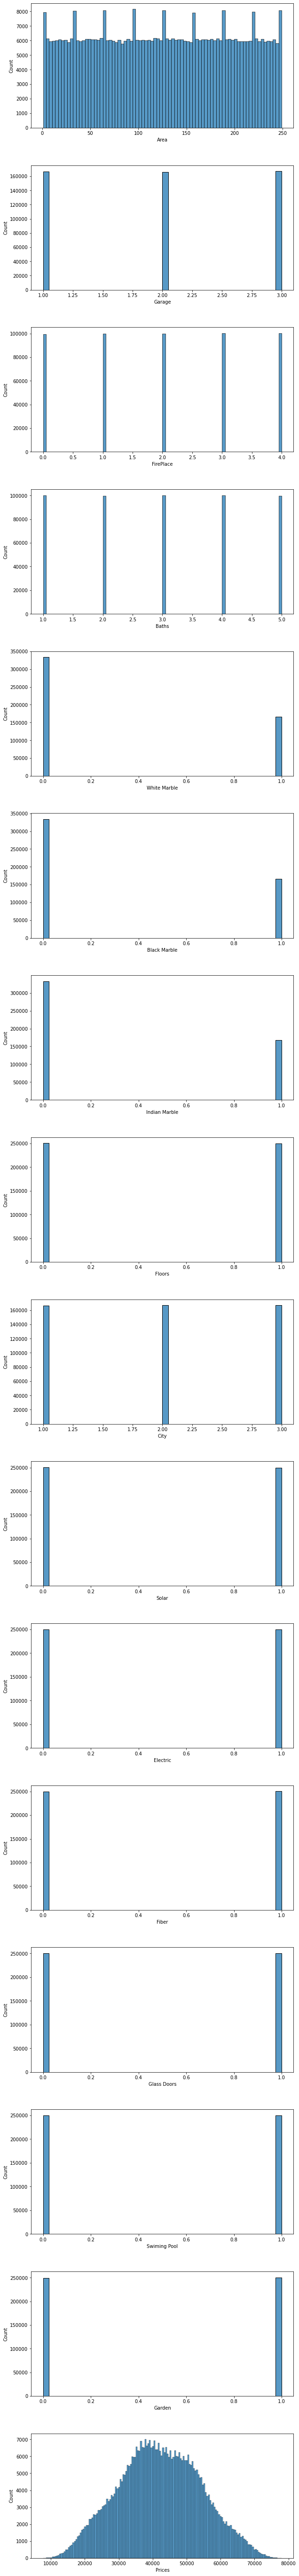

In [5]:
# Histograms

fig, axs = plt.subplots(len(df.columns), figsize=(10, 100))
fig.subplots_adjust(hspace=0.3)
for n, col in enumerate(df.columns):
    sns.histplot(df, x=col, ax=axs[n])

- Area is distributed uniformally
- 1 - 3 Garages
- 0 - 4 FirePlaces
- 1 - 5 Baths
- 3 Cities
- White Marble, Black Marble, Indian Marble, Floors, Solar, Electric, Fiber, Glass Doors, Swimming Pool, Garden are all Binary Variables
- Prices are normally distributed

In [6]:
# Correlation and Heatmap
price_correlation = df.corr()[-1:].sort_values(by='Prices', axis=1, ascending=False)
price_correlation

Prices    Floors     Fiber  White Marble      City  Glass Doors  \
Prices     1.0  0.619451  0.484626      0.448154  0.233259     0.181973   

            Area     Baths    Garage  FirePlace  Electric     Solar  \
Prices  0.147717  0.145087  0.100294   0.089139  0.052443  0.008429   

        Swiming Pool   Garden  Black Marble  Indian Marble  
Prices      0.001787  0.00154     -0.078049      -0.369756

In [7]:
fig = px.imshow(price_correlation)
fig.show()

In [8]:
df.corr()

Area    Garage  FirePlace     Baths  White Marble  \
Area           1.000000 -0.000897   0.000374 -0.000398      0.002525   
Garage        -0.000897  1.000000   0.001307 -0.003647      0.000541   
FirePlace      0.000374  0.001307   1.000000  0.000643      0.000952   
Baths         -0.000398 -0.003647   0.000643  1.000000      0.002493   
White Marble   0.002525  0.000541   0.000952  0.002493      1.000000   
Black Marble  -0.001477  0.001847  -0.000922 -0.002739     -0.498893   
Indian Marble -0.001047 -0.002385  -0.000030  0.000246     -0.500723   
Floors        -0.000776 -0.000931   0.000185 -0.000880      0.000078   
City          -0.003455  0.000793  -0.000211 -0.000858     -0.000861   
Solar          0.000526  0.001480  -0.000309 -0.000755     -0.001583   
Electric      -0.000128  0.000779   0.001342  0.001047      0.000558   
Fiber          0.000114 -0.000562   0.001818 -0.000687     -0.000576   
Glass Doors   -0.001230 -0.002171  -0.000366 -0.001668     -0.000402   
Swiming Pool   0.000610  0.001088   0.001295  0.002212     -0.001898   
Garden         0.001428 -0.000669   0.000231  0.001723      0.000959   
Prices         0.147717  0.100294   0.089139  0.145087      0.448154   

               Black Marble  Indian Marble    Floors      City     Solar  \
Area              -0.001477      -0.001047 -0.000776 -0.003455  0.000526   
Garage             0.001847      -0.002385 -0.000931  0.000793  0.001480   
FirePlace         -0.000922      -0.000030  0.000185 -0.000211 -0.000309   
Baths             -0.002739       0.000246 -0.000880 -0.000858 -0.000755   
White Marble      -0.498893      -0.500723  0.000078 -0.000861 -0.001583   
Black Marble       1.000000      -0.500383 -0.000368 -0.000324  0.001764   
Indian Marble     -0.500383       1.000000  0.000289  0.001184 -0.000180   
Floors            -0.000368       0.000289  1.000000 -0.000641 -0.002651   
City              -0.000324       0.001184 -0.000641  1.000000  0.000488   
Solar              0.001764      -0.000180 -0.002651  0.000488  1.000000   
Electric          -0.000549      -0.000010  0.000082  0.000788  0.001883   
Fiber              0.000073       0.000503  0.001373 -0.002716  0.000238   
Glass Doors        0.000086       0.000316 -0.000008  0.000770 -0.000817   
Swiming Pool       0.000713       0.001184 -0.000211  0.000322 -0.000466   
Garden             0.000133      -0.001091 -0.000492  0.001207 -0.004263   
Prices            -0.078049      -0.369756  0.619451  0.233259  0.008429   

               Electric     Fiber  Glass Doors  Swiming Pool    Garden  \
Area          -0.000128  0.000114    -0.001230      0.000610  0.001428   
Garage         0.000779 -0.000562    -0.002171      0.001088 -0.000669   
FirePlace      0.001342  0.001818    -0.000366      0.001295  0.000231   
Baths          0.001047 -0.000687    -0.001668      0.002212  0.001723   
White Marble   0.000558 -0.000576    -0.000402     -0.001898  0.000959   
Black Marble  -0.000549  0.000073     0.000086      0.000713  0.000133   
Indian Marble -0.000010  0.000503     0.000316      0.001184 -0.001091   
Floors         0.000082  0.001373    -0.000008     -0.000211 -0.000492   
City           0.000788 -0.002716     0.000770      0.000322  0.001207   
Solar          0.001883  0.000238    -0.000817     -0.000466 -0.004263   
Electric       1.000000 -0.000309     0.001088      0.000571  0.000772   
Fiber         -0.000309  1.000000    -0.002268      0.004127 -0.000023   
Glass Doors    0.001088 -0.002268     1.000000      0.000396  0.003329   
Swiming Pool   0.000571  0.004127     0.000396      1.000000 -0.000191   
Garden         0.000772 -0.000023     0.003329     -0.000191  1.000000   
Prices         0.052443  0.484626     0.181973      0.001787  0.001540   

                 Prices  
Area           0.147717  
Garage         0.100294  
FirePlace      0.089139  
Baths          0.145087  
White Marble   0.448154  
Black Marble  -0.078049  
Indian Marble -0.369756  
Floors         0.619451  
City    

<AxesSubplot:>

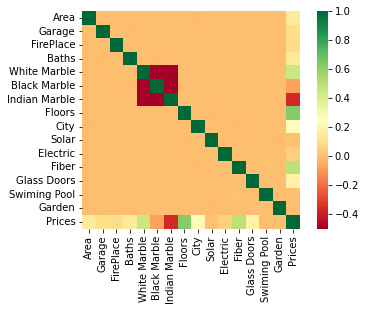

In [9]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

- Floors, Fiber & White Marble have the strongest positive correlation with price
- Black & Indian Marble appear to be less sought after, given the negative correlation with price 

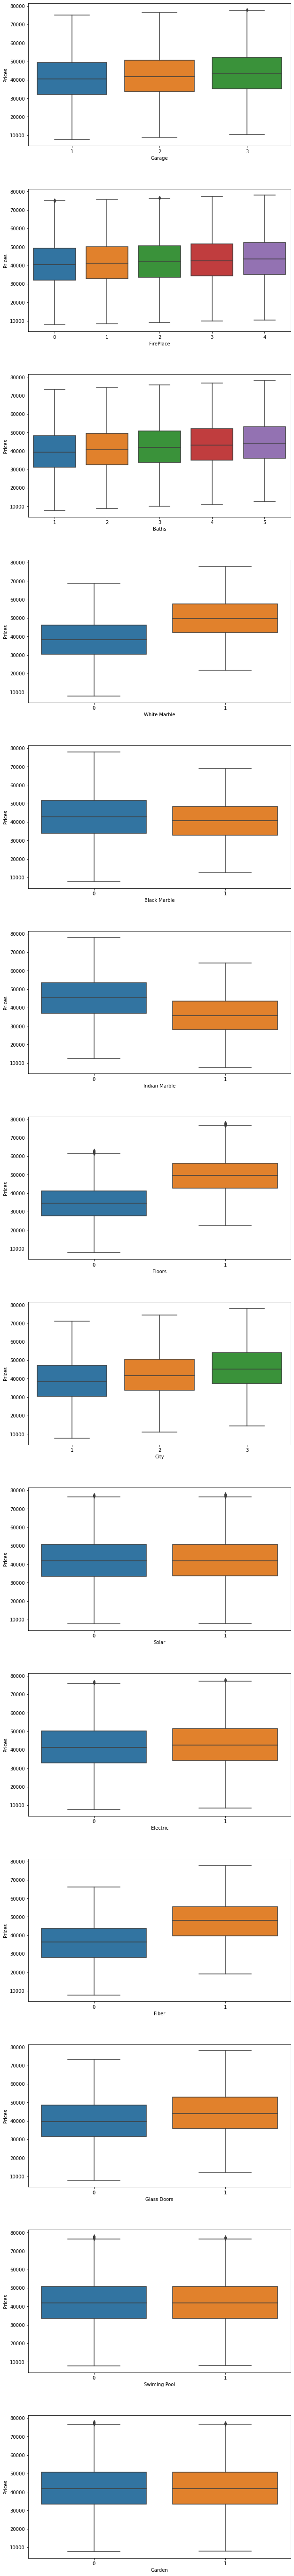

In [10]:
# Box Plots - Categorical Variables

cols = ['Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
       'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber',
       'Glass Doors', 'Swiming Pool', 'Garden']

fig, axs = plt.subplots(len(cols), figsize=(10, 100))
fig.subplots_adjust(hspace=0.3)
for n, col in enumerate(cols):
    sns.boxplot(data=df, y= 'Prices', x=col, ax=axs[n])

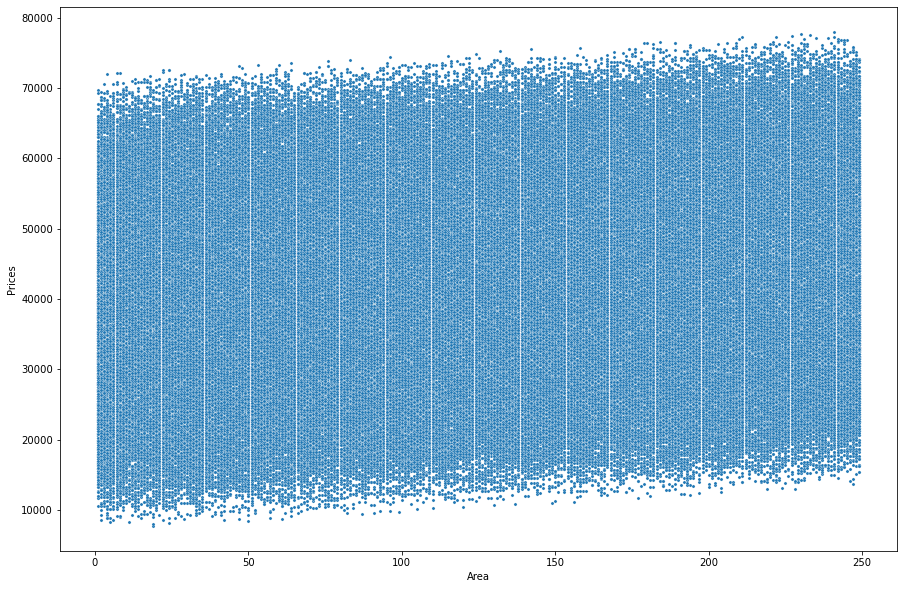

In [11]:
# Scatter Plot - Area vs Price

fig, axs = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, y='Prices', x='Area', s=10)
plt.show()

The above visuals confirm the information we took from the correlations. The biggest price variance shown by the boxplots are in the Floors, Fiber and White Marble variables.

The scatter plot also shows the weak positive relationship between Area and Prices.

In [12]:
df.corr()['Prices'].sort_values()

Indian Marble   -0.369756
Black Marble    -0.078049
Garden           0.001540
Swiming Pool     0.001787
Solar            0.008429
Electric         0.052443
FirePlace        0.089139
Garage           0.100294
Baths            0.145087
Area             0.147717
Glass Doors      0.181973
City             0.233259
White Marble     0.448154
Fiber            0.484626
Floors           0.619451
Prices           1.000000
Name: Prices, dtype: float64

In [13]:
# # We'll pick the predictor variables that are most correlated with Prices

predictor_columns = ['Indian Marble', 'Floors', 'Fiber', 'White Marble', 'City', 'Glass Doors', 'Area',
                     'Baths', 'Garage']

---

# Models

In [14]:
# Split into Feature & Target Variables

X = df.drop('Prices', axis=1)
y = df['Prices']

In [15]:
# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Linear Regression

In [16]:
# Instantiate Model - Linear
linreg = LinearRegression()

#Fit Model
linreg.fit(X_train, y_train)

#Prediction
linreg_pred = linreg.predict(X_test)
lingreg_pred_train = linreg.predict(X_train)

#Calculate Scores
rmse_train = mean_squared_error(y_train, lingreg_pred_train, squared=False)
R2 = linreg.score(X_test, y_test)
mse = mean_squared_error(y_test, linreg_pred, squared=True)
rmse = mean_squared_error(y_test, linreg_pred, squared=False)
mae = mean_absolute_error(y_test, linreg_pred)
mape = mean_absolute_percentage_error(y_test, linreg_pred)

#Create dataframe to report scores
metrics_df = pd.DataFrame({'Model': 'Linear Regression',
                           'RMSE_Train': rmse_train,
                           'R2': R2,
                           'MSE': mse,
                           'RMSE': rmse,
                           'MAE': mae,
                           'MAPE': mape},
                            index=[0])

In [17]:
# Linear Regression Cross Validation - 4 Folds
linreg_cv = cross_validate(linreg, X_train, y_train, cv=4, scoring=('r2', 
                                                        'neg_root_mean_squared_error',
                                                        'neg_mean_squared_error',
                                                        'neg_mean_absolute_error', 
                                                        'neg_mean_absolute_percentage_error'))

#Add mean metrics to dataframe
cv_metrics = pd.DataFrame({'Model': 'Linear Regression 4 Fold-CV',
                           'R2': linreg_cv['test_r2'].mean(),
                           'MSE': linreg_cv['test_neg_mean_squared_error'].mean(),
                           'RMSE': linreg_cv['test_neg_root_mean_squared_error'].mean(),
                           'MAE': linreg_cv['test_neg_mean_absolute_error'].mean(),
                           'MAPE': linreg_cv['test_neg_mean_absolute_percentage_error'].mean()},
                         index=[0])

### Lasso Regression

In [18]:
# Instantiate Model - Lasso
lasso = Lasso()

# Fit model
lasso.fit(X_train, y_train)

#Prediction
lasso_pred = lasso.predict(X_test)
lasso_pred_train = lasso.predict(X_train)

#Calculate Scores
rmse_train = mean_squared_error(y_train, lasso_pred_train, squared=False)
R2 = lasso.score(X_test, y_test)
mse = mean_squared_error(y_test, lasso_pred, squared=True)
rmse = mean_squared_error(y_test, lasso_pred, squared=False)
mae = mean_absolute_error(y_test, lasso_pred)
mape = mean_absolute_percentage_error(y_test, lasso_pred)

#Add to metrics dataframe
metrics_df.loc[1] = ['Lasso Regression', rmse_train, R2, mse, rmse, mae, mape]

In [19]:
##GridSearch for Lasso

# Create the hyperparameter grid
alphas=np.linspace(0,1,50)
param_grid = {'alpha': alphas}

# Setup the GridSearchCV object: gm_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=4)

# Fit it to the training data
lasso_cv.fit(X_train,y_train)

print(f"Tuned Lasso Alpha: {lasso_cv.best_params_}")

Tuned Lasso Alpha: {'alpha': 0.0}


In [20]:
#Prediction
lassoCV_pred = lasso_cv.predict(X_test)
lassoCV_pred_train = lasso_cv.predict(X_train)

#Calculate Scores
rmse_train = mean_squared_error(y_train, lassoCV_pred_train, squared=False)
R2 = lasso_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, lassoCV_pred, squared=True)
rmse = mean_squared_error(y_test, lassoCV_pred, squared=False)
mae = mean_absolute_error(y_test, lassoCV_pred)
mape = mean_absolute_percentage_error(y_test, lassoCV_pred)

#Add metrics to dataframe
metrics_df.loc[2] = ['LassoCV Regression', rmse_train, R2, mse, rmse, mae, mape]

In [21]:
# Lasso Regression Cross Validation - 4 Folds
lasso_scores = cross_validate(lasso, X_train, y_train, cv=4, scoring=('r2', 
                                                        'neg_root_mean_squared_error',
                                                        'neg_mean_squared_error',
                                                        'neg_mean_absolute_error', 
                                                        'neg_mean_absolute_percentage_error'))


#Add mean metrics to dataframe
cv_metrics.loc[1] = ['Lasso Regression 4 Fold CV', lasso_scores['test_r2'].mean(), 
                     lasso_scores['test_neg_mean_squared_error'].mean(),
                    lasso_scores['test_neg_root_mean_squared_error'].mean(), lasso_scores['test_neg_mean_absolute_error'].mean(),
                    lasso_scores['test_neg_mean_absolute_percentage_error'].mean()]

### Ridge Regression

In [22]:
# Instantiate Model - Ridge
ridge = Ridge()

# Fit model
ridge.fit(X_train, y_train)

#Prediction
ridge_pred = ridge.predict(X_test)
ridge_pred_train = ridge.predict(X_train)

#Calculate Scores
rmse_train = mean_squared_error(y_train, ridge_pred_train, squared=False)
R2 = ridge.score(X_test, y_test)
mse = mean_squared_error(y_test, ridge_pred, squared=True)
rmse = mean_squared_error(y_test, ridge_pred, squared=False)
mae = mean_absolute_error(y_test, ridge_pred)
mape = mean_absolute_percentage_error(y_test, ridge_pred)

#Add to metrics dataframe
metrics_df.loc[3] = ['Ridge Regression', rmse_train, R2, mse, rmse, mae, mape]

In [23]:
# Ridge Regression Cross Validation - 4 Folds
ridge_cv = cross_validate(ridge, X_train, y_train, cv=4, scoring=('r2', 
                                                        'neg_root_mean_squared_error',
                                                        'neg_mean_squared_error',
                                                        'neg_mean_absolute_error', 
                                                        'neg_mean_absolute_percentage_error'))

#Add mean metrics to dataframe
cv_metrics.loc[2] = ['Ridge Regression 4 Fold-CV', ridge_cv['test_r2'].mean(), ridge_cv['test_neg_mean_squared_error'].mean(),
                    ridge_cv['test_neg_root_mean_squared_error'].mean(), ridge_cv['test_neg_mean_absolute_error'].mean(),
                     ridge_cv['test_neg_mean_absolute_percentage_error'].mean()]

### Results

In [24]:
metrics_df

Model    RMSE_Train   R2           MSE          RMSE  \
0   Linear Regression  1.846112e-10  1.0  3.408158e-20  1.846120e-10   
1    Lasso Regression  5.347844e+00  1.0  2.830339e+01  5.320093e+00   
2  LassoCV Regression  1.610077e-02  1.0  2.591697e-04  1.609875e-02   
3    Ridge Regression  1.232827e-01  1.0  1.515989e-02  1.231255e-01   

            MAE          MAPE  
0  1.525570e-10  4.027337e-15  
1  4.279647e+00  1.194905e-04  
2  1.329057e-02  3.185477e-07  
3  1.016527e-01  2.865947e-06

In [25]:
cv_metrics

Model   R2           MSE          RMSE           MAE  \
0  Linear Regression 4 Fold-CV  1.0 -3.834440e-20 -1.898316e-10 -1.591123e-10   
1   Lasso Regression 4 Fold CV  1.0 -2.860360e+01 -5.348202e+00 -4.308120e+00   
2   Ridge Regression 4 Fold-CV  1.0 -2.702419e-02 -1.643893e-01 -1.355964e-01   

           MAPE  
0 -4.151591e-15  
1 -1.202507e-04  
2 -3.826032e-06

## Conclusion

We were able to create models for this dataset using Linear, Lasso and Ridge. Additionally, we conducted hyperparameter tuning for Lasso Regression.

Based on the results reported above, we'd proceed with the Linear Regression model, as it has provided the lowest errors across the board. Additionally, there's no sign of Over/Underfitting.

We were able to confirm using Cross Validation that there is stablity in our models, shown by the average metrics being close to the scores received in the indidvidual models.